# Pile-up package demo

This notebook provides an example of the public API of the package.

In [1]:
import buildup.api as bu
import matplotlib.pyplot as plt

In [2]:
# Load the response function corresponding to air exposure
w_exposure=bu.get_dose_weight("air",1.225E-3)

In [3]:
# Load a build-up coefficient
b=bu.get_buildup_data(geometry="planariso", material="concrete", weight=w_exposure)

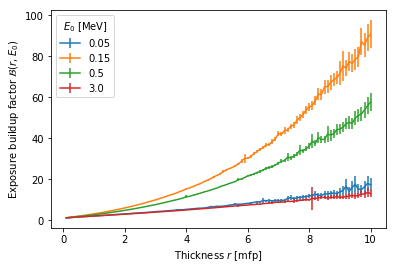

In [4]:
# Plot some series in energy
for i in [2,6,10,15]:
    # Distances are provided up to 20 mfp in steps of 0.1
    # The latter values are, in general, too noisy to be used, plot up to 10mfp.
    plt.errorbar(b.distances[:100], b.values[i,:100],
                 yerr=b.get_error(stat_factor=2.0)[i,:100],label=b.energies[i])
plt.legend(title="$E_0$ [MeV]")
plt.xlabel("Thickness $r$ [mfp]")
plt.ylabel(r"Exposure buildup factor $\mathcal{B}(r, E_0)$")
plt.show()

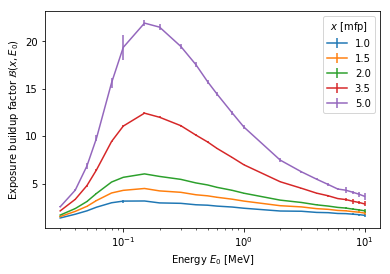

In [5]:
# Plot some series in depth
for i in [9,14,19,34,49]:
    plt.errorbar(b.energies, b.values[:,i],
                 yerr=b.get_error(stat_factor=2.0)[:,i],label="%.1f"%b.distances[i])
plt.legend(title="$x$ [mfp]")
plt.xlabel("Energy $E_0$ [MeV]")
plt.ylabel(r"Exposure buildup factor $\mathcal{B}(x, E_0)$")
plt.xscale("log", nonposx='clip')
plt.show()

In [6]:
# Calculate the ratio of two build-up factors
# Warnings rise due to 0 values in thickness well beyond 10 mfp functions.
# This is a feature, not a bug.
b_ratio=b/bu.get_buildup_data(geometry="isotropic", material="concrete", weight=w_exposure)

/home/guillehg/git/buildup/buildup/api.py:451: RuntimeWarning: divide by zero encountered in true_divide
  values = self.values / other.values
/home/guillehg/git/buildup/buildup/api.py:451: RuntimeWarning: invalid value encountered in true_divide
  values = self.values / other.values
/home/guillehg/git/buildup/buildup/api.py:454: RuntimeWarning: invalid value encountered in true_divide
  np.square(self.stat_error / self.values) + np.square(other.stat_error / other.values))
/home/guillehg/git/buildup/buildup/api.py:257: RuntimeWarning: divide by zero encountered in true_divide
  return _interval_prod(a, b, 1 / d, 1 / c)
/home/guillehg/git/buildup/buildup/api.py:252: RuntimeWarning: invalid value encountered in multiply
  return _element_wise_min(a * c, a * d, b * c, b * d), _element_wise_max(a * c, a * d, b * c, b * d)
/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwar

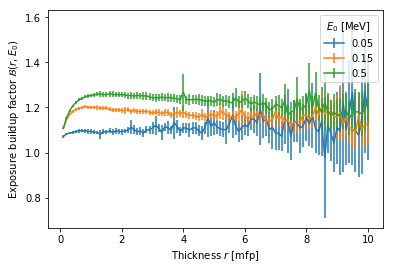

In [7]:
# Plot some series in energy of the ratio, just as we did before with the values
for i in [2,6,10]:
    # Distances are provided up to 20 mfp in steps of 0.1
    # The latter values are, in general, too noisy to be used, plot up to 10mfp.
    plt.errorbar(b_ratio.distances[:100], b_ratio.values[i,:100],
                 yerr=b_ratio.get_error(stat_factor=2.0)[i,:100],label=b_ratio.energies[i])
plt.legend(title="$E_0$ [MeV]")
plt.xlabel("Thickness $r$ [mfp]")
plt.ylabel(r"Exposure buildup factor $\mathcal{B}(r, E_0)$")
plt.show()